In [2]:
import spotipy
import pandas as pd
import json
from config_file import SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET
import pprint
from dotenv import load_dotenv
load_dotenv()
from io import StringIO


print(f"Successfully loaded Client ID: {SPOTIFY_CLIENT_ID}")

Successfully loaded Client ID: d27240c3a55143ff8bdf61b5bb37ced9


In [3]:
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET))

In [4]:
if 'df' not in globals():
    df = pd.DataFrame(columns=["artist_id", "artist", "followers", "popularity", "genres"])


# Mary Lattimore

In [5]:
name = "Mary Lattimore"   # change this if you want
res = sp.search(q=name, type="artist", limit=5)
items = res["artists"]["items"]
len(items), items[0]["name"], items[0]["id"]


(5, 'Mary Lattimore', '38MKhZmMRHAZRz8LqtKIBw')

In [7]:
aid = items[0]["id"]
a = sp.artist(aid)

row = {
    "artist_id": a["id"],
    "artist": a["name"],
    "followers": a["followers"]["total"],
    "popularity": a["popularity"],
    "genres": ", ".join(a.get("genres", [])[:5])
}
row

{'artist_id': '38MKhZmMRHAZRz8LqtKIBw',
 'artist': 'Mary Lattimore',
 'followers': 59951,
 'popularity': 44,
 'genres': 'ambient, art pop'}

In [8]:
tops = sp.artist_top_tracks(aid, country="US")["tracks"]
[(t["name"], t["popularity"]) for t in tops[:5]]


[('Oh I Miss Her So', 44),
 ('Dreaming of the Kelly Pool', 41),
 ("Sometimes He's In My Dreams", 41),
 ('Wait For Now - Mary Lattimore Rework', 37),
 ('Pine Trees', 37)]

# Juliana Barwick

In [9]:
name2 = "Julianna Barwick"   # change this if you want
res2 = sp.search(q=name2, type="artist", limit=5)
items2 = res2["artists"]["items"]
len(items2), items2[0]["name"], items2[0]["id"]


(5, 'Julianna Barwick', '0HWfFWL4vVrbaBQqxVCwCi')

In [10]:
aid2 = items2[0]["id"]
a2 = sp.artist(aid2)

row2 = {
    "artist_id": a2["id"],
    "artist": a2["name"],
    "followers": a2["followers"]["total"],
    "popularity": a2["popularity"],
    "genres": ", ".join(a2.get("genres", [])[:5])
}
row2


{'artist_id': '0HWfFWL4vVrbaBQqxVCwCi',
 'artist': 'Julianna Barwick',
 'followers': 91993,
 'popularity': 47,
 'genres': 'ambient, drone, art pop'}

# Laraaji

In [12]:
name2 = "Laraaji"   # change this if you want
res2 = sp.search(q=name2, type="artist", limit=5)
items2 = res2["artists"]["items"]
len(items2), items2[0]["name"], items2[0]["id"]


(5, 'Laraaji', '6sd3qv6kReAdo6WsLBtXX4')

In [14]:
name3 = "Laraaji"
res3 = sp.search(q=name3, type="artist", limit=5)
candidates = res3["artists"]["items"]

# pick exact name match if available, otherwise first result
art3 = next((a for a in candidates if a["name"].lower() == name3.lower()),
            candidates[0])

art3["name"], art3["id"], art3["followers"]["total"], art3["popularity"]


('Laraaji', '6sd3qv6kReAdo6WsLBtXX4', 67080, 46)

In [15]:
a3 = sp.artist(art3["id"])

row3 = {
    "artist_id": a3["id"],
    "artist": a3["name"],
    "followers": a3["followers"]["total"],
    "popularity": a3["popularity"],
    "genres": ", ".join(a3.get("genres", [])[:5])
}
row3


{'artist_id': '6sd3qv6kReAdo6WsLBtXX4',
 'artist': 'Laraaji',
 'followers': 67080,
 'popularity': 46,
 'genres': 'ambient, drone, new age'}

## Kelly Moran

In [16]:
name4 = "Kelly Moran"
res4 = sp.search(q=name4, type="artist", limit=10)
cands4 = res4["artists"]["items"]

art4 = next((a for a in cands4 if a["name"].lower() == name4.lower()),
            cands4[0])

art4["name"], art4["id"], art4["followers"]["total"], art4["popularity"]


('Kelly Moran', '4M1M6wBMvcwdQ5EHUAVKgK', 1080, 23)

In [17]:
a4 = sp.artist(art4["id"])

row4 = {
    "artist_id": a4["id"],
    "artist": a4["name"],
    "followers": a4["followers"]["total"],
    "popularity": a4["popularity"],
    "genres": ", ".join(a4.get("genres", [])[:5])
}
row4


{'artist_id': '4M1M6wBMvcwdQ5EHUAVKgK',
 'artist': 'Kelly Moran',
 'followers': 1080,
 'popularity': 23,
 'genres': ''}

## Malibu

In [19]:
name5 = "Malibu"
res5 = sp.search(q=name5, type="artist", limit=10)
cands5 = res5["artists"]["items"]

art5 = next((a for a in cands4 if a["name"].lower() == name5.lower()),
            cands5[0])

art5["name"], art5["id"], art5["followers"]["total"], art5["popularity"]

('Malibu', '3gfV2LBMvIE9gjpvowt11B', 21490, 38)

In [20]:
a5 = sp.artist(art5["id"])

row5 = {
    "artist_id": a5["id"],
    "artist": a5["name"],
    "followers": a5["followers"]["total"],
    "popularity": a5["popularity"],
    "genres": ", ".join(a5.get("genres", [])[:5])
}
row5

{'artist_id': '3gfV2LBMvIE9gjpvowt11B',
 'artist': 'Malibu',
 'followers': 21490,
 'popularity': 38,
 'genres': 'ambient, drone'}

In [ ]:
import pandas as pd

rows = [row, row2, row3, row4, row5]   # make sure these vars exist
df = pd.concat([pd.DataFrame([r]) for r in rows], ignore_index=True)
df = df[["artist_id","artist","followers","popularity","genres"]]
df

df.loc[3, "genres"] = "ambient, piano, experimental" 

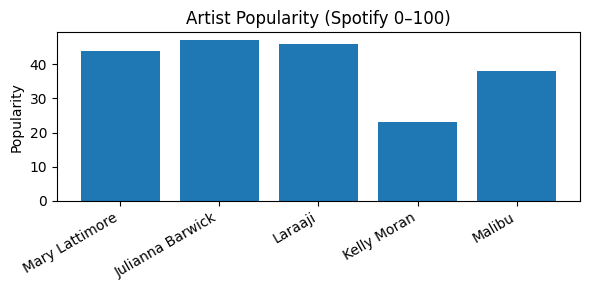

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.bar(df["artist"], df["popularity"])
plt.title("Artist Popularity (Spotify 0–100)")
plt.ylabel("Popularity")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [22]:
import os
output_dir = "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
#save the DataFrame to a CSV file in the 'output' folder
file_path = os.path.join(output_dir, "ambient_artists_popularity.csv")
df.to_csv(file_path, index=False)

print(f"DataFrame successfully saved to {file_path}")

DataFrame successfully saved to output/ambient_artists_popularity.csv


In [23]:
import requests, pandas as pd

def fetch_tables(url: str):
    headers = {"User-Agent": "Mozilla/5.0 (class project)"}
    html = requests.get(url, headers=headers, timeout=15).text
    return pd.read_html(html)

def preview_tables(url: str):
    tables = fetch_tables(url)
    for i, t in enumerate(tables):
        print(i, "→", [str(c) for c in t.columns][:6])
    
    return tables


In [24]:
import requests, pandas as pd, time
from urllib.parse import urlparse, parse_qs, unquote
from email.utils import parsedate_to_datetime
from datetime import datetime, timedelta, timezone
import xml.etree.ElementTree as ET

HDRS = {"User-Agent": "Mozilla/5.0 (student project)"}

def _resolve_google_link(href: str) -> str:
    # Google News RSS often wraps the real URL in ?url=
    try:
        p = urlparse(href)
        qs = parse_qs(p.query)
        if "url" in qs and qs["url"]:
            return unquote(qs["url"][0])
    except Exception:
        pass
    return href

def news_mentions(artist: str, domain: str = "billboard.com",
                  months: int = 36, quoted: bool = True, sleep_s: float = 0.5):
    q = f'site:{domain} "{artist}"' if quoted else f'site:{domain} {artist}'
    url = "https://news.google.com/rss/search"
    r = requests.get(url, params={"q": q, "hl":"en-US", "gl":"US", "ceid":"US:en"},
                     headers=HDRS, timeout=15)
    r.raise_for_status()

    root = ET.fromstring(r.content)
    chan = root.find("channel")
    items = chan.findall("item") if chan is not None else []

    cutoff = datetime.now(timezone.utc) - timedelta(days=months*30)

    rows = []
    after_domain = 0
    for it in items:
        title = (it.findtext("title") or "").strip()
        raw_link = (it.findtext("link") or "").strip()
        link = _resolve_google_link(raw_link)
        pub = (it.findtext("pubDate") or it.findtext("{http://www.w3.org/2005/Atom}updated") or "").strip()
        try:
            dt = parsedate_to_datetime(pub)
            if dt is not None and dt.tzinfo is None:
                dt = dt.replace(tzinfo=timezone.utc)
        except Exception:
            dt = None

        dom = urlparse(link).netloc.lower()
        # domain check first (so we can count how many pass)
        if domain in dom:
            after_domain += 1
            if dt and dt >= cutoff:
                rows.append({"title": title, "link": link, "published_at": dt})

    time.sleep(sleep_s)
    df = pd.DataFrame(rows, columns=["title", "link", "published_at"])
    if not df.empty:
        df = df.sort_values("published_at", ascending=False).reset_index(drop=True)

    debug = {
        "query": q,
        "total_items": len(items),
        "pass_domain": after_domain,
        "pass_date": len(df),
    }
    return len(df), df, debug


In [27]:
domains = ["billboard.com", "pitchfork.com", "theguardian.com", "rollingstone.com", "residentadvisor.net"]

def press_index(artist: str, months: int = 36):
    total = 0
    details = []
    for d in domains:
        cnt, _, dbg = news_mentions(artist, domain=d, months=months, quoted=False)
        total += cnt
        details.append((d, cnt, dbg["total_items"]))
    return total, details

# Example:
score, breakdown = press_index("Laraaji")
score, breakdown


(0,
 [('billboard.com', 0, 8),
  ('pitchfork.com', 0, 100),
  ('theguardian.com', 0, 60),
  ('rollingstone.com', 0, 15),
  ('residentadvisor.net', 0, 0)])

In [28]:
import requests, pandas as pd, time, xml.etree.ElementTree as ET
from urllib.parse import urlparse, parse_qs, unquote
from email.utils import parsedate_to_datetime
from datetime import datetime, timedelta, timezone

HDRS = {"User-Agent": "Mozilla/5.0 (student project)"}

def _resolve_google_link(href: str) -> str:
    # Some links include ?url=<real>; keep this as a fallback
    try:
        p = urlparse(href); qs = parse_qs(p.query)
        if "url" in qs and qs["url"]:
            return unquote(qs["url"][0])
    except Exception:
        pass
    return href

def news_mentions(artist: str, domain: str = "billboard.com",
                  months: int = 36, quoted: bool = True, sleep_s: float = 0.3):
    q = f'site:{domain} "{artist}"' if quoted else f'site:{domain} {artist}'
    url = "https://news.google.com/rss/search"
    r = requests.get(url, params={"q": q, "hl":"en-US", "gl":"US", "ceid":"US:en"},
                     headers=HDRS, timeout=15)
    r.raise_for_status()

    root = ET.fromstring(r.content)
    chan = root.find("channel")
    items = chan.findall("item") if chan is not None else []

    cutoff = datetime.now(timezone.utc) - timedelta(days=months*30)

    rows, after_domain = [], 0
    for it in items:
        title = (it.findtext("title") or "").strip()
        raw_link = (it.findtext("link") or "").strip()
        link = _resolve_google_link(raw_link)
        pub = (it.findtext("pubDate") or it.findtext("{http://www.w3.org/2005/Atom}updated") or "").strip()
        try:
            dt = parsedate_to_datetime(pub)
            if dt is not None and dt.tzinfo is None:
                dt = dt.replace(tzinfo=timezone.utc)
        except Exception:
            dt = None

        # NEW: check <source url="https://www.billboard.com">…</source>
        src = it.find("source")
        src_dom = urlparse(src.attrib.get("url", "")).netloc.lower() if src is not None else ""

        # match if publisher domain matches OR (fallback) link domain matches
        link_dom = urlparse(link).netloc.lower()
        is_match = (domain in src_dom) or (domain in link_dom)

        if is_match:
            after_domain += 1
            if dt and dt >= cutoff:
                rows.append({"title": title, "link": link, "published_at": dt})

    time.sleep(sleep_s)

    df = pd.DataFrame(rows, columns=["title","link","published_at"])
    if not df.empty:
        df = df.sort_values("published_at", ascending=False).reset_index(drop=True)

    debug = {"query": q, "total_items": len(items), "pass_domain": after_domain, "pass_date": len(df)}
    return len(df), df, debug


In [29]:
cnt, articles, dbg = news_mentions("Laraaji", "billboard.com", quoted=False)
print(dbg)
print(cnt)
articles.head(3)


{'query': 'site:billboard.com Laraaji', 'total_items': 8, 'pass_domain': 8, 'pass_date': 3}
3


,title,link,published_at
0,Sade’s First New Song in Six Years Included in...,https://news.google.com/rss/articles/CBMitgFBV...,2024-09-04 07:00:00+00:00
1,Sam Smith To Cover Canadian Legend Beverly Gle...,https://news.google.com/rss/articles/CBMif0FVX...,2024-09-04 07:00:00+00:00
2,"FYI Schedule of Upcoming Releases, May 25, 202...",https://news.google.com/rss/articles/CBMie0FVX...,2023-05-25 07:00:00+00:00


In [30]:
domains = [
    "billboard.com",
    "pitchfork.com",
    "theguardian.com",
    "rollingstone.com",
    "residentadvisor.net"
]

def press_index(artist: str, months: int = 36):
    total = 0
    per_domain = {}
    for d in domains:
        cnt, _, _ = news_mentions(artist, domain=d, months=months, quoted=False)
        total += cnt
        per_domain[d] = cnt
    return total, per_domain

laraaji_score, breakdown = press_index("Laraaji")
laraaji_score, breakdown

(77,
 {'billboard.com': 3,
  'pitchfork.com': 32,
  'theguardian.com': 31,
  'rollingstone.com': 11,
  'residentadvisor.net': 0})

In [49]:
# assumes df has a column named "artist"
df["press_index_36m"] = 0

for name in df["artist"].tolist():
    score, breakdown = press_index(name, months=36)  # try 60 if your artists are niche
    df.loc[df["artist"] == name, "press_inclusion_36m"] = int(score)
    # (optional) keep a peek at where the mentions came from
    for d, c in breakdown.items():
        col = f"press_{d.replace('.', '_')}"
        if col not in df.columns:
            df[col] = 0
        df.loc[df["artist"] == name, col] = int(c)

df.sort_values(["press_inclusion_36m"], ascending=[False]).reset_index(drop=True)


,spotify_artist_id,artist,spotify_followers,spotify_popularity,spotify_genres,press_inclusion_36m,billboard,pitchfork,the_guardian,rolling_stone,...,press_index_36m,press_billboard_com,press_pitchfork_com,press_theguardian_com,press_rollingstone_com,press_residentadvisor_net,press_thequietus_com,press_stereogum_com,press_daily_bandcamp_com,press_npr_org
0,3gfV2LBMvIE9gjpvowt11B,Malibu,21490,38,"ambient, drone",233,20,26,37,31,...,0,20,26,37,31,0,10,45,19,45
1,6sd3qv6kReAdo6WsLBtXX4,Laraaji,67080,46,"ambient, drone, new age",172,3,32,31,11,...,0,3,32,31,11,0,27,40,15,13
2,4M1M6wBMvcwdQ5EHUAVKgK,Kelly Moran,1080,23,"ambient, piano, experimental",129,15,50,25,3,...,0,15,50,25,3,0,7,11,2,16
3,38MKhZmMRHAZRz8LqtKIBw,Mary Lattimore,59951,44,"ambient, art pop",120,9,26,4,18,...,0,9,26,4,18,0,17,18,14,14
4,0HWfFWL4vVrbaBQqxVCwCi,Julianna Barwick,91993,47,"ambient, drone, art pop",50,2,17,2,3,...,0,2,17,2,3,0,11,7,4,4


In [34]:
domains = [
    "billboard.com",
    "pitchfork.com",
    "theguardian.com",
    "rollingstone.com",
    "residentadvisor.net",
    "thequietus.com",
    "stereogum.com",
    "daily.bandcamp.com",  # Bandcamp editorial
    "npr.org"
]

def press_index(artist: str, months: int = 36):
    total = 0
    per_domain = {}
    for d in domains:
        cnt, _, _ = news_mentions(artist, domain=d, months=months, quoted=False)
        per_domain[d] = cnt
        total += cnt
    return total, per_domain

# enrich your df (assumes df['artist'] exists)
df["press_inclusion_36m"] = 0
for name in df["artist"].tolist():
    score, breakdown = press_index(name)
    df.loc[df["artist"] == name, "press_inclusion_36m"] = int(score)
    for d, c in breakdown.items():
        col = f"press_{d.replace('.', '_')}"
        if col not in df.columns:
            df[col] = 0
        df.loc[df["artist"] == name, col] = int(c)

popularity_index = df.sort_values(["press_inclusion_36m","popularity"], ascending=[False, False]).reset_index(drop=True)


In [35]:
popularity_index.to_csv("ambient_artist_press_index.csv", index=False)

In [36]:
import pandas as pd
import numpy as np

url = "ambient_artist_press_index.csv"
df = pd.read_csv(url)

df

,artist_id,artist,followers,popularity,genres,press_index_36m,press_billboard_com,press_pitchfork_com,press_theguardian_com,press_rollingstone_com,press_residentadvisor_net,press_inclusion_36m,press_thequietus_com,press_stereogum_com,press_daily_bandcamp_com,press_npr_org
0,3gfV2LBMvIE9gjpvowt11B,Malibu,21490,38,"ambient, drone",0,20,26,37,31,0,231,10,45,19,43
1,6sd3qv6kReAdo6WsLBtXX4,Laraaji,67080,46,"ambient, drone, new age",0,3,32,31,11,0,172,27,40,15,13
2,4M1M6wBMvcwdQ5EHUAVKgK,Kelly Moran,1080,23,"ambient, piano, experimental",0,15,50,25,3,0,129,7,11,2,16
3,38MKhZmMRHAZRz8LqtKIBw,Mary Lattimore,59951,44,"ambient, art pop",0,9,26,4,18,0,120,17,18,14,14
4,0HWfFWL4vVrbaBQqxVCwCi,Julianna Barwick,91993,47,"ambient, drone, art pop",0,2,17,2,3,0,50,11,7,4,4


In [39]:
# drop redundant columns if they exist
df.drop(columns=["press_index_36m"], errors='ignore', inplace=True)

df

,artist_id,artist,followers,popularity,genres,press_billboard_com,press_pitchfork_com,press_theguardian_com,press_rollingstone_com,press_residentadvisor_net,press_inclusion_36m,press_thequietus_com,press_stereogum_com,press_daily_bandcamp_com,press_npr_org
0,3gfV2LBMvIE9gjpvowt11B,Malibu,21490,38,"ambient, drone",20,26,37,31,0,233,10,45,19,45
1,6sd3qv6kReAdo6WsLBtXX4,Laraaji,67080,46,"ambient, drone, new age",3,32,31,11,0,172,27,40,15,13
2,4M1M6wBMvcwdQ5EHUAVKgK,Kelly Moran,1080,23,"ambient, piano, experimental",15,50,25,3,0,129,7,11,2,16
3,38MKhZmMRHAZRz8LqtKIBw,Mary Lattimore,59951,44,"ambient, art pop",9,26,4,18,0,120,17,18,14,14
4,0HWfFWL4vVrbaBQqxVCwCi,Julianna Barwick,91993,47,"ambient, drone, art pop",2,17,2,3,0,50,11,7,4,4


In [40]:
# rename columnns for clarity
df = df.rename(columns={"artist_id": "spotify_artist_id",
               "followers": "spotify_followers",
               "popularity": "spotify_popularity",
               "genres": "spotify_genres",
               "press_billboard_com": "billboard",
               "press_pitchfork_com": "pitchfork",
               "press_theguardian_com": "the_guardian",
               "press_rollingstone_com": "rolling_stone",
               "press_residentadvisor_net": "resident_advisor",
               "press_thequietus_com": "the_quietus",
               "press_stereogum_com": "stereogum",
               "press_daily_bandcamp_com": "bandcamp_editorial",
               "press_npr_org": "npr"})

In [41]:
df

,spotify_artist_id,artist,spotify_followers,spotify_popularity,spotify_genres,billboard,pitchfork,the_guardian,rolling_stone,resident_advisor,press_inclusion_36m,the_quietus,stereogum,bandcamp_editorial,npr
0,3gfV2LBMvIE9gjpvowt11B,Malibu,21490,38,"ambient, drone",20,26,37,31,0,233,10,45,19,45
1,6sd3qv6kReAdo6WsLBtXX4,Laraaji,67080,46,"ambient, drone, new age",3,32,31,11,0,172,27,40,15,13
2,4M1M6wBMvcwdQ5EHUAVKgK,Kelly Moran,1080,23,"ambient, piano, experimental",15,50,25,3,0,129,7,11,2,16
3,38MKhZmMRHAZRz8LqtKIBw,Mary Lattimore,59951,44,"ambient, art pop",9,26,4,18,0,120,17,18,14,14
4,0HWfFWL4vVrbaBQqxVCwCi,Julianna Barwick,91993,47,"ambient, drone, art pop",2,17,2,3,0,50,11,7,4,4


In [43]:
# reorder coluimns for readability
cols = list(df.columns)
cols.remove("press_inclusion_36m")
cols.insert(5, "press_inclusion_36m")
df = df[cols]

df

,spotify_artist_id,artist,spotify_followers,spotify_popularity,spotify_genres,press_inclusion_36m,billboard,pitchfork,the_guardian,rolling_stone,resident_advisor,the_quietus,stereogum,bandcamp_editorial,npr
0,3gfV2LBMvIE9gjpvowt11B,Malibu,21490,38,"ambient, drone",233,20,26,37,31,0,10,45,19,45
1,6sd3qv6kReAdo6WsLBtXX4,Laraaji,67080,46,"ambient, drone, new age",172,3,32,31,11,0,27,40,15,13
2,4M1M6wBMvcwdQ5EHUAVKgK,Kelly Moran,1080,23,"ambient, piano, experimental",129,15,50,25,3,0,7,11,2,16
3,38MKhZmMRHAZRz8LqtKIBw,Mary Lattimore,59951,44,"ambient, art pop",120,9,26,4,18,0,17,18,14,14
4,0HWfFWL4vVrbaBQqxVCwCi,Julianna Barwick,91993,47,"ambient, drone, art pop",50,2,17,2,3,0,11,7,4,4


In [45]:
df["press_inclusion_36m"].describe()

count      5.000000
mean     140.800000
std       67.621742
min       50.000000
25%      120.000000
50%      129.000000
75%      172.000000
max      233.000000
Name: press_inclusion_36m, dtype: float64

In [47]:
df.duplicated(subset=["artist"]).sum()

np.int64(0)